# Chapter.3 Single-variate Linear Regression without Bias Term

## Programming Assignment.3-07 Learning with Various Normal Distributions

PA 3-07에서는 다양한 distribution에서부터 만들어진 dataset을 대상으로 model을 학습시켜봅니다.  
이를 통해 SVLR model에 어떤 data가 들어오는지에 따라 learning rate에 변화를 줘야하는 이유에 대해 살펴봅니다.  
또한 추후 bias term이 포함되었을 때, weight와 bias의 학습속도 차이가 벌어지는 이유를 분석하는데 도움을 줍니다.

PA 3-07는 스스로 dataset을 바꿔가며 분석하는 assignment이기 때문에 정답은 제공되지 않습니다.

<ul>
    <li> Step.1 Learning with Standard Normal Distribution </li>
    <li> Step.2 Learning with Various std </li>
    <li> Step.3 Learning with Various mean </li>
    <li> Step.4 Learning with Various Normal Distribution </li>
</ul>

먼저 필요한 library와 module들을 import 해줍니다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import os
import sys
utils_path = os.path.dirname(os.path.abspath(__name__)) + '/../utils/'
if utils_path not in sys.path:    
    sys.path.append(utils_path)

import basic_nodes as nodes
from LR_dataset_generator import LR_dataset_generator
    
plt.style.use('seaborn')
np.random.seed(0)

그리고 PA 3-06의 Step.2에서 작성한 model/loss implementation 내용과,  
PA 3-06 마지막에서 작성한 trainer를 복사/붙여넣기 해주세요.

In [2]:
##### Start Your Code(Model/Loss Implementation) #####
node1 = nodes.mul_node()
node2 = nodes.minus_node()
node3 = nodes.square_node()
##### End Your Code(Model/Loss Implementation) #####


##### Start Your Code(trainer Function) #####
def trainer(dataset, th, lr, epochs):
    ##### Start Your Code(trainer Functionalization) #####
    node1 = nodes.mul_node()
    node2 = nodes.minus_node()
    node3 = nodes.square_node()
    
    th_list = []
    loss_list = []

    for epoch in range(epochs):
        for data_sample in dataset:
            x, y = data_sample[1], data_sample[2]

            z1 = node1.forward(th,x)
            z2 = node2.forward(y,z1)
            l = node3.forward(z2)

            dz2 = node3.backward(1)
            dy, dz1 = node2.backward(dz2)
            dth, dx = node1.backward(dz1)

            th_list.append(th)
            loss_list.append(l)

            th = th - lr*dth

    fig = plt.figure(figsize = (15,10))
    left, bottom = 0.1, 0.1
    width, height = 0.3, 0.4
    spacing = 0.05

    ax_th = fig.add_axes([left, bottom + height + spacing, width,
                            1-(2*bottom + height + spacing)])
    ax_loss = fig.add_axes([left, bottom, width, height])
    ax_pred = fig.add_axes([left + width + spacing, bottom,
                           1 - (2*left + width + spacing), 2*height])

    ax_th.set_title(r'$\theta$', fontsize = 30)
    ax_loss.set_title(r'$\mathcal{L}$', fontsize = 30)
    ax_pred.set_title('Predictor', fontsize = 30)
    ax_th.plot(th_list)
    ax_loss.plot(loss_list)

    ax_pred.scatter(dataset[:,1], dataset[:,-1])
    cmap = cm.get_cmap('rainbow', lut = len(th_list))
    x_range = np.array([np.min(dataset[:,1]), np.max(dataset[:,1])])
    for th_idx, th in enumerate(th_list):
        pred = th*x_range

        ax_pred.plot(x_range, pred, color = cmap(th_idx),
                    alpha = 0.3)
    return th_list,loss_list
##### End Your Code(trainer Function) #####

***
## Step.1 Learning with Standard Normal Distribution

먼저 학습의 비교대상이 되는 standard normal distribution에서부터 만들어진 dataset에 대해 학습을 진행해봅니다.  
다음은 mean=0, std=1로 dataset을 customizing하여 만든 뒤, 학습을 진행한 모습입니다.

이때 learning rate이 0.008에 대한 결과임을 주목하고 Step.2, Step.3와 비교해보세요.

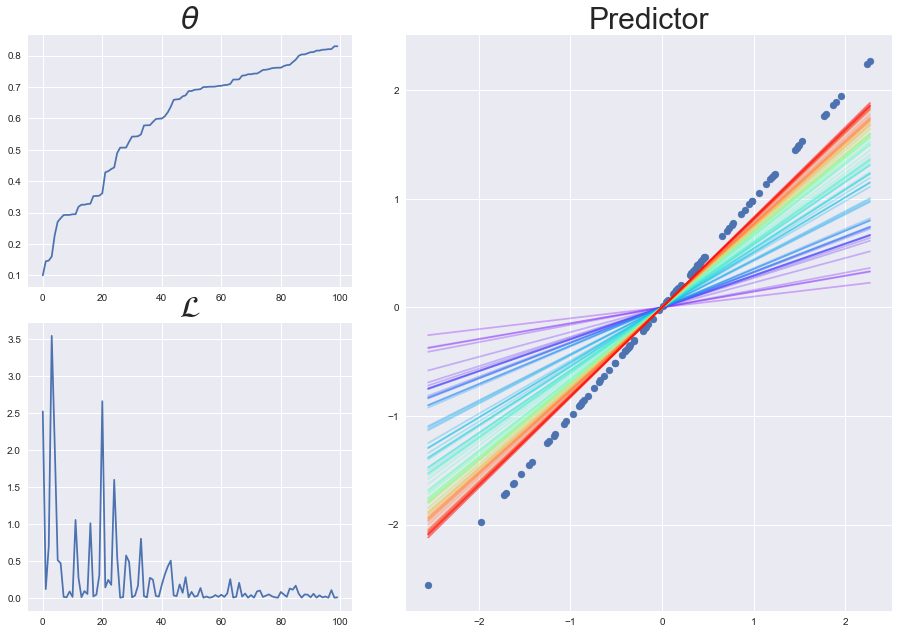

In [6]:
np.random.seed(0)
data_gen = LR_dataset_generator(feature_dim = 1)

distribution_params = {1:{'mean':0, 'std':1}}
data_gen.set_distribution_params(distribution_params)

dataset = data_gen.make_dataset()

th = 0.1
lr = 0.008
epochs = 1

th_list,loss_list =trainer(dataset, th, lr, epochs)

***
## Step.2 Learning with Various std

다음은 distribution_param에서 standard deviation을 변화시키며 이 변화가 학습에 어떤 영향을 미치는지 살펴봅니다.

***
**Programming**  
Step.1의 코드를 참고하여 standard deviation이 각각 2, 5, 10, 15일 때의 학습을 살펴보고 어떤 변화가 있는지,  
그리고 이 변화가 일어난 이유에 대하여 분석하세요.

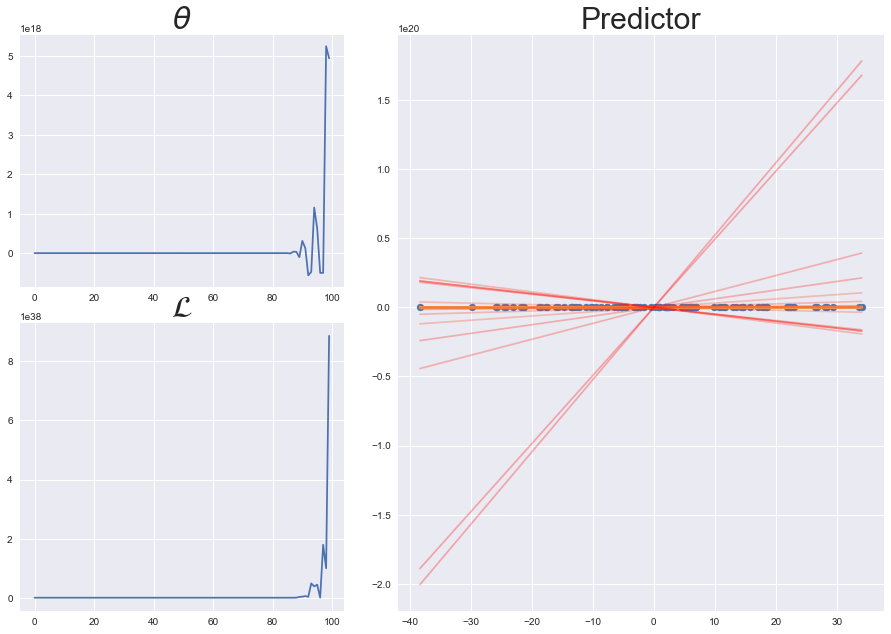

In [27]:
np.random.seed(0)
##### Start Your Code(Customizing Dataset) #####
data_gen = LR_dataset_generator(feature_dim = 1)
distribution_params = {1:{'mean':0, 'std':15}} #편차가 크다는 건 이상치 같은 값들이 많다는 것.

data_gen.set_distribution_params(distribution_params)

dataset = data_gen.make_dataset()

th = 0.1
lr = 0.008
epochs = 1
##### End Your Code(Customizing Dataset) #####


##### Start Your Code(Training) #####
th_list,loss_list =trainer(dataset, th, lr, epochs)
##### Start Your Code(Training) #####

***
## Step.3 Learning with Various mean

다음은 distribution_param에서 mean을 변화시키며 이 변화가 학습에 어떤 영향을 미치는지 살펴봅니다.

***
**Programming**  
Step.1의 코드를 참고하여 mean이 각각 
- 2, 5, 10, 15일 때의 학습을 살펴보고 어떤 변화가 있는지, 그리고 이 변화가 일어난 이유에 대하여 분석하세요.
- -2, -5, -10, -15일 때의 학습을 살펴보고 어떤 변화가 있는지, 그리고 이 변화가 일어난 이유에 대하여 분석하세요.


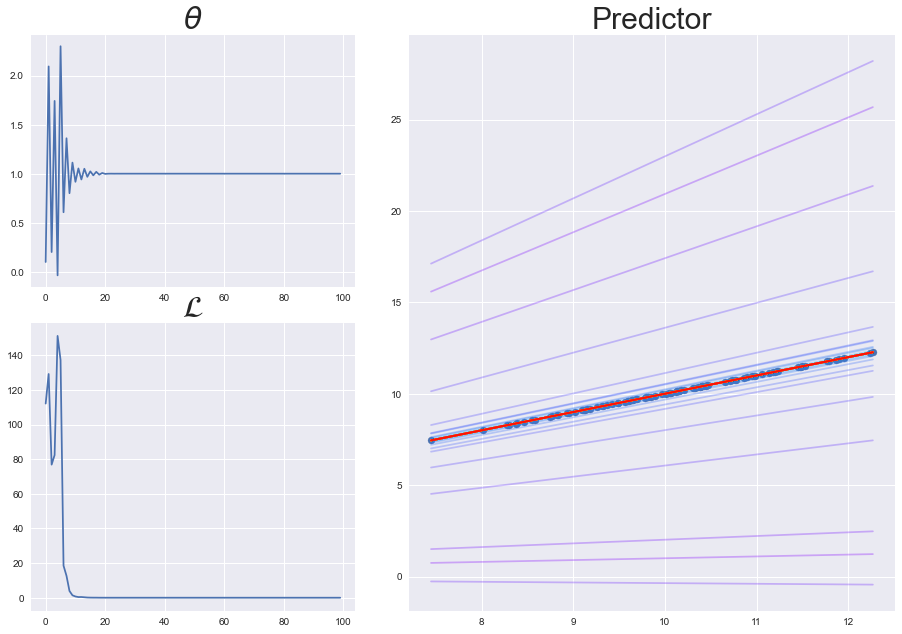

In [43]:
np.random.seed(0)
##### Start Your Code(Customizing Dataset) #####
data_gen = LR_dataset_generator(feature_dim = 1)
distribution_params = {1:{'mean':10, 'std':1}} #데이터엔 튀는 값은 없지만 값 자체가 높아서 예측선 높낮이가 다르다. 값 자체가 크면 loss도 크다.

data_gen.set_distribution_params(distribution_params)

dataset = data_gen.make_dataset()

th = 0.1
lr = 0.008
epochs = 1
##### End Your Code(Customizing Dataset) #####


##### Start Your Code(Training) #####
th_list,loss_list =trainer(dataset, th, lr, epochs)
##### Start Your Code(Training) #####

***
## Step.4 Learning with Various Normal Distribution

Step.2, Step.3의 결과를 이용하여 여러분들이 각자 마음에 드는 normal distribution을 만든 뒤,  
학습을 진행해보세요. 그리고 각 distribution들에 대해 최적의 learning rate을 찾아보고 비교해보세요.

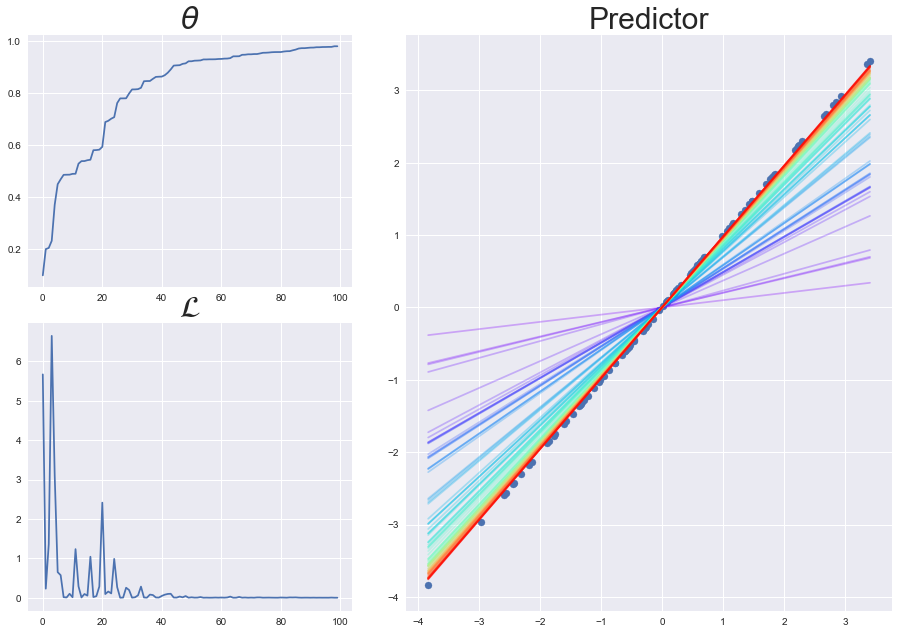

In [38]:
np.random.seed(0)
##### Start Your Code(Customizing Dataset) #####
distribution_params = {1:{'mean':0, 'std':1.5}}
data_gen.set_distribution_params(distribution_params)
dataset = data_gen.make_dataset()
##### End Your Code(Customizing Dataset) #####

th = 0.1
lr = 0.008
epochs = 1

##### Start Your Code(Training) #####
th_list,loss_list =trainer(dataset, th, lr, epochs)
##### Start Your Code(Training) #####